In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
train_path = '/home/mohammad/Documents/catvnoncat/train_catvnoncat.h5'
test_path = '/home/mohammad/Documents/catvnoncat/test_catvnoncat.h5'

def load_data():
    with h5py.File(train_path, 'r') as dataset:
        print(list(dataset.keys()))
        train_set_x = dataset["train_set_x"][:]
        train_set_y = dataset["train_set_y"][:]
        classes = dataset["list_classes"][:]
    with h5py.File(test_path, 'r') as dataset2:
        print(list(dataset2.keys()))
        test_set_x = dataset2["test_set_x"][:]
        test_set_y = dataset2["test_set_y"][:]
    return train_set_x, train_set_y, test_set_x, test_set_y, classes

train_set_x, train_set_y, test_set_x, test_set_y, classes = load_data()

['list_classes', 'train_set_x', 'train_set_y']
['list_classes', 'test_set_x', 'test_set_y']


y: 1


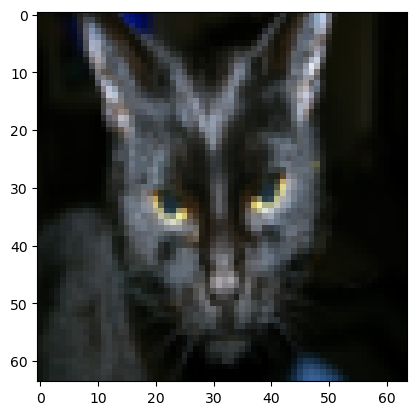

In [3]:
index = 25
plt.imshow(train_set_x[index])
print(f"y: {train_set_y[index]}")

In [4]:
print(f"num of train: {train_set_x.shape[0]} \nnum of test: {test_set_x.shape[0]}\nnum of pixel:{train_set_x.shape[1]}")

num of train: 209 
num of test: 50
num of pixel:64


In [5]:
train_set_x.shape

(209, 64, 64, 3)

In [6]:
train_set_x_flatten = train_set_x.reshape(train_set_x.shape[0], -1).T
test_set_x_flatten = test_set_x.reshape(test_set_x.shape[0], -1).T

In [7]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [14]:
train_set_x.shape

(12288, 209)

In [8]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [11]:
def initialize(dim):
    w = np.zeros((dim,1))
    b = 0
    return w, b

In [19]:
def propagate(w,b,x,y):
    w = w
    b = b
    m = x.shape[1]
    A = sigmoid(np.dot(w.T,x)+b)
    cost = -1/m * np.sum(y * np.log(A))+(1-y)*np.log(1-A)
    dw = np.dot(x, (A-y).T)/m
    db = np.sum(A-y)/m
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [42]:
def optimize(w,b,x,y, iter=100,alpha = 0.009, print_cost=False):
    costs = []
    for i in range(iter):
        grads, cost = propagate(w,b,x,y)
        dw = grads["dw"]
        db = grads["db"]

        w = w - alpha*dw
        b = b - alpha*db
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
        # if print_cost:
        #     print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [24]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
params, grads, costs = optimize(w, b, X, Y, iter=100, alpha=0.009, print_cost=False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array([0.15809348, 0.15809348, 0.15535778])]


In [29]:
def predict(w,b,x):
    m = x.shape[1]
    prediction = np.zeros((1,m))
    w = w.reshape(x.shape[0],1)
    A = sigmoid(np.dot(w.T,x)+b)
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            prediction[0,i] = 1
        else:
            prediction[0,i] = 0
        
        # YOUR CODE ENDS HERE
    
    return prediction

In [30]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [40]:
def model(x_train, y_train, x_test, y_test, iter=2000, alpha=0.5, print_cost=False):
    w, b = initialize(x_train.shape[0])
    params, grads, costs = optimize(w, b, x_train, y_train, iter=iter, alpha=alpha, 
                                    print_cost=print_cost)
    w = params["w"]
    b = params["b"]

    y_pred_test = predict(w, b, x_test)
    y_pred_train = predict(w, b, x_train)

    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))
    
    
    d = {"costs": costs,
            "Y_prediction_test": y_pred_test, 
            "Y_prediction_train" : y_pred_train, 
            "w" : w, 
            "b" : b,
            "learning_rate" : alpha,
            "num_iterations": iter}
        
    return d

In [43]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, iter=2000, alpha=0.005, print_cost=True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

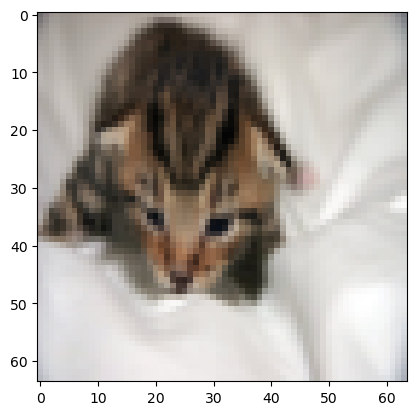

In [46]:
# Example of a picture that was wrongly classified.
index = 1
num_px = 64
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['y_pred_test'][0,index])].decode("utf-8") +  "\" picture.")